In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import math
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew 
import matplotlib.pyplot as plt  
from scipy import stats
pd.set_option('display.max_columns', 999)
warnings.filterwarnings("ignore")
warnings.warn('my warning')

In [2]:
train_file=pd.read_csv("train.csv")
# shape of the file
print(train_file.shape)
train_file.head()

(15000, 40)


,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [3]:
test_file1=pd.read_csv("test.csv")
# shape of the file
print(test_file1.shape)
test_file1.head(5)

(5000, 39)


,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq
0,17591,saving,F,30,528.0,NaN,42771.755048,NaN,7.0,13.0,25.0,NaN,3.0,9.0,45553.0,NaN,NaN,NaN,NaN,NaN,222364.513432,NaN,NaN,463739.683047,213570.034897,19.0,5.0,414855.130729,536192.664464,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,NaN
1,13541,saving,M,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,31.0,8.0,8.0,18.0,191137.0,NaN,NaN,NaN,NaN,NaN,434630.699792,NaN,NaN,448622.399166,450550.848920,23.0,2.0,589557.278448,148220.153433,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,NaN
2,13431,current,M,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,3.0,6.0,5.0,8.0,82114.0,NaN,NaN,NaN,NaN,NaN,111071.003382,NaN,NaN,182112.736659,254344.887804,23.0,5.0,91845.314970,479041.867291,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,NaN
3,8687,current,F,24,548.0,NaN,6744.070501,NaN,9.0,2.0,2.0,NaN,1.0,NaN,74866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549095.984242,385614.872092,15.0,1.0,234808.062527,459470.252371,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,NaN
4,14727,current,M,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,26.0,10.0,13.0,13.0,73548.0,NaN,NaN,NaN,NaN,1.371296e+06,NaN,NaN,NaN,188671.004952,146363.893024,22.0,1.0,370699.272099,263422.644148,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,NaN


In [4]:
train_file=train_file.drop(['ID'], axis=1)
print(train_file.shape)
train_file.head(5)

(15000, 39)


,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [5]:
test_file=test_file1.drop(['ID'], axis=1)
test_file.head(5)

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq
0,saving,F,30,528.0,NaN,42771.755048,NaN,7.0,13.0,25.0,NaN,3.0,9.0,45553.0,NaN,NaN,NaN,NaN,NaN,222364.513432,NaN,NaN,463739.683047,213570.034897,19.0,5.0,414855.130729,536192.664464,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,NaN
1,saving,M,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,31.0,8.0,8.0,18.0,191137.0,NaN,NaN,NaN,NaN,NaN,434630.699792,NaN,NaN,448622.399166,450550.848920,23.0,2.0,589557.278448,148220.153433,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,NaN
2,current,M,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,3.0,6.0,5.0,8.0,82114.0,NaN,NaN,NaN,NaN,NaN,111071.003382,NaN,NaN,182112.736659,254344.887804,23.0,5.0,91845.314970,479041.867291,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,NaN
3,current,F,24,548.0,NaN,6744.070501,NaN,9.0,2.0,2.0,NaN,1.0,NaN,74866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549095.984242,385614.872092,15.0,1.0,234808.062527,459470.252371,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,NaN
4,current,M,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,26.0,10.0,13.0,13.0,73548.0,NaN,NaN,NaN,NaN,1.371296e+06,NaN,NaN,NaN,188671.004952,146363.893024,22.0,1.0,370699.272099,263422.644148,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,NaN


In [6]:
count=train_file['account_type'].value_counts()
count

current    11797
saving      3203
Name: account_type, dtype: int64

In [7]:
count=test_file['account_type'].value_counts()
count

current    3894
saving     1106
Name: account_type, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder() 
train_file['gender']= label_encoder.fit_transform(train_file['gender']) 
train_file['account_type']= label_encoder.fit_transform(train_file['account_type']) 
train_file.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,1,0,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,1.0,1.0,3.0,248145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,0,1,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,7.0,5.0,11.0,24005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,0,1,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,NaN,9.0,8.0,55953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,0,1,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,3.0,5.0,16.0,406984.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,0,1,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,NaN,5.0,14.0,34545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [9]:
test_file['gender']= label_encoder.fit_transform(test_file['gender']) 
test_file['account_type']= label_encoder.fit_transform(test_file['account_type']) 
test_file.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq
0,1,0,30,528.0,NaN,42771.755048,NaN,7.0,13.0,25.0,NaN,3.0,9.0,45553.0,NaN,NaN,NaN,NaN,NaN,222364.513432,NaN,NaN,463739.683047,213570.034897,19.0,5.0,414855.130729,536192.664464,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,NaN
1,1,1,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,31.0,8.0,8.0,18.0,191137.0,NaN,NaN,NaN,NaN,NaN,434630.699792,NaN,NaN,448622.399166,450550.848920,23.0,2.0,589557.278448,148220.153433,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,NaN
2,0,1,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,3.0,6.0,5.0,8.0,82114.0,NaN,NaN,NaN,NaN,NaN,111071.003382,NaN,NaN,182112.736659,254344.887804,23.0,5.0,91845.314970,479041.867291,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,NaN
3,0,0,24,548.0,NaN,6744.070501,NaN,9.0,2.0,2.0,NaN,1.0,NaN,74866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549095.984242,385614.872092,15.0,1.0,234808.062527,459470.252371,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,NaN
4,0,1,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,26.0,10.0,13.0,13.0,73548.0,NaN,NaN,NaN,NaN,1.371296e+06,NaN,NaN,NaN,188671.004952,146363.893024,22.0,1.0,370699.272099,263422.644148,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,NaN


In [10]:
train_file.isnull().sum()

account_type                 0
gender                       0
age                          0
region_code                  0
dc_cons_apr               8613
dc_cons_may               7847
dc_cons_jun               9666
cc_count_apr              1085
cc_count_may               530
cc_count_jun               744
dc_count_apr              8613
dc_count_may              7847
dc_count_jun              7110
card_lim                     9
personal_loan_active     13741
vehicle_loan_active      14611
personal_loan_closed     13747
vehicle_loan_closed      14289
investment_1             14357
investment_2             13904
investment_3             14381
investment_4             14815
debit_amount_apr           644
credit_amount_apr         1485
debit_count_apr            751
credit_count_apr           776
max_credit_amount_apr     1483
debit_amount_may           996
credit_amount_may         1478
credit_count_may           885
debit_count_may            885
max_credit_amount_may     1478
debit_am

In [11]:
test_file.isnull().sum()

account_type                0
gender                      0
age                         0
region_code                 0
dc_cons_apr              2903
dc_cons_may              2667
dc_cons_jun              3248
cc_count_apr              361
cc_count_may              180
cc_count_jun              259
dc_count_apr             2903
dc_count_may             2667
dc_count_jun             2378
card_lim                    3
personal_loan_active     4607
vehicle_loan_active      4867
personal_loan_closed     4587
vehicle_loan_closed      4754
investment_1             4806
investment_2             4673
investment_3             4808
investment_4             4936
debit_amount_apr          235
credit_amount_apr         516
debit_count_apr           255
credit_count_apr          255
max_credit_amount_apr     517
debit_amount_may          339
credit_amount_may         495
credit_count_may          313
debit_count_may           313
max_credit_amount_may     495
debit_amount_jun          330
credit_amo

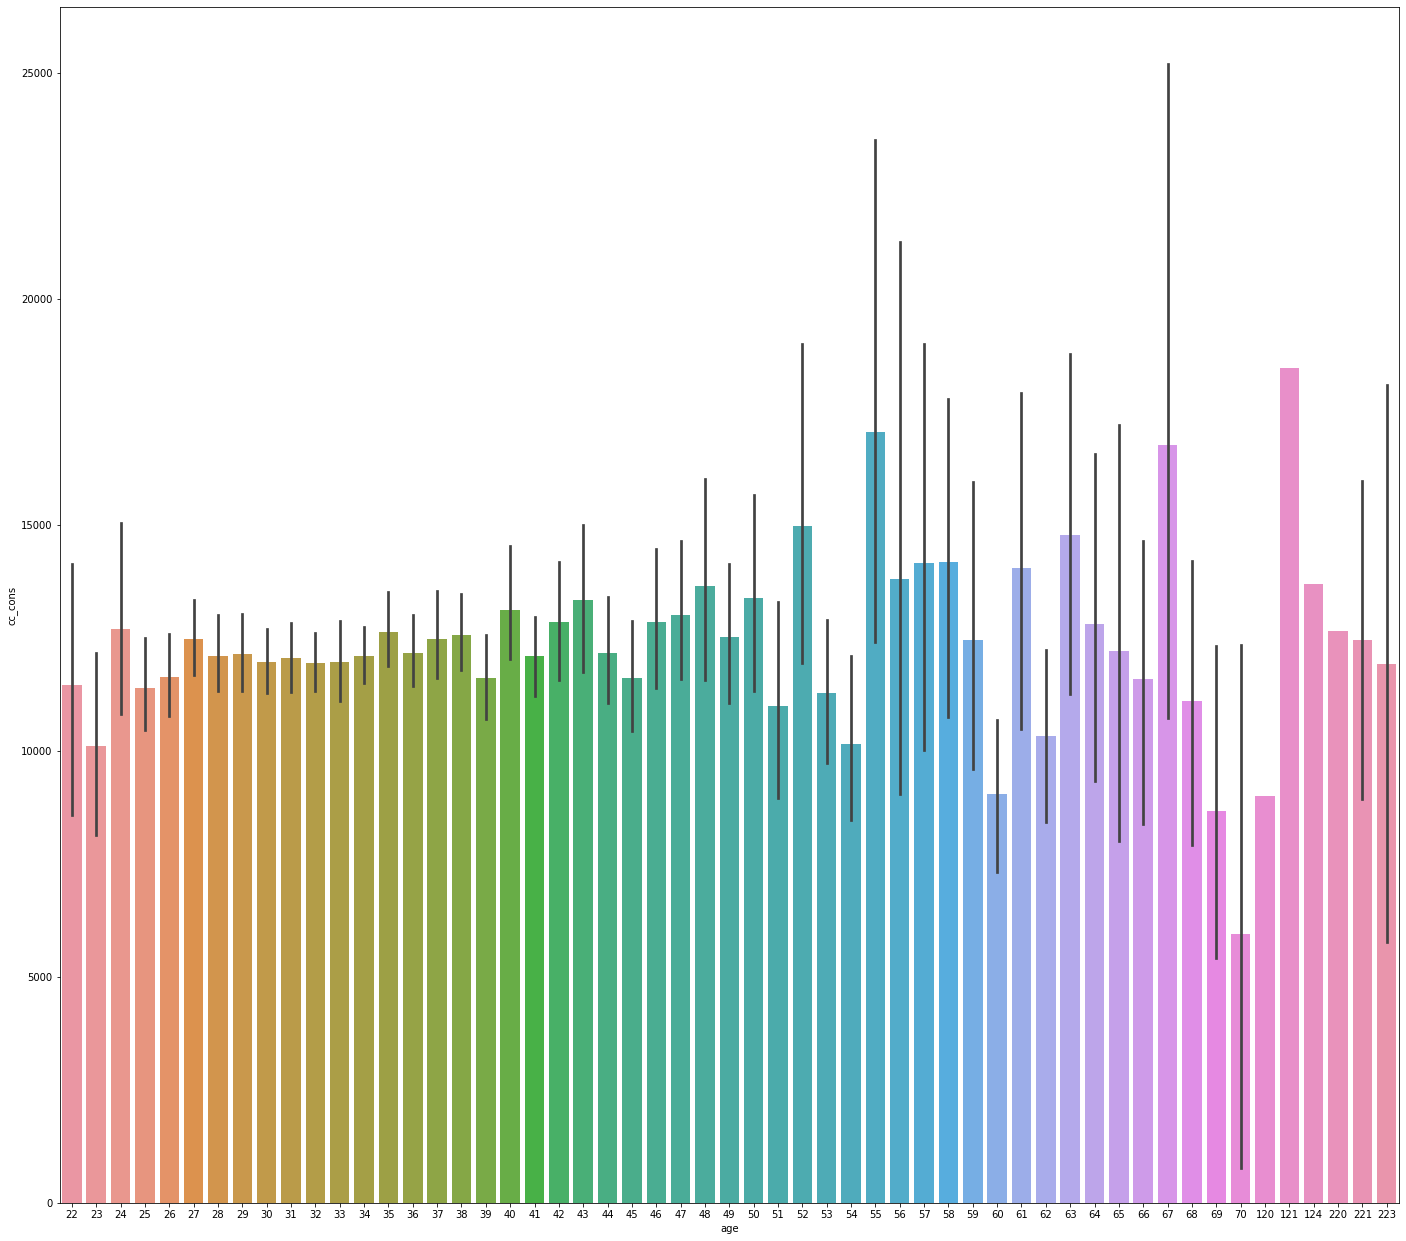

In [37]:
fig, ax = plt.subplots(figsize = (24, 22))
sns.barplot('age','cc_cons', data = train_file, ax = ax)

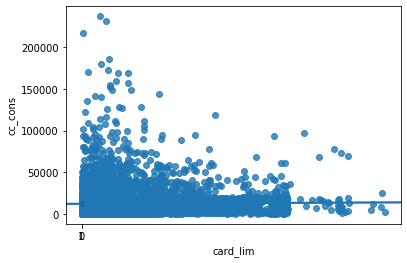

In [40]:
sns.barplot('account_type','cc_cons', data = train_file)

sns.regplot(x = 'card_lim', y = 'cc_cons', data = train_file)
corr = train_file.corr()
#Plot figsize


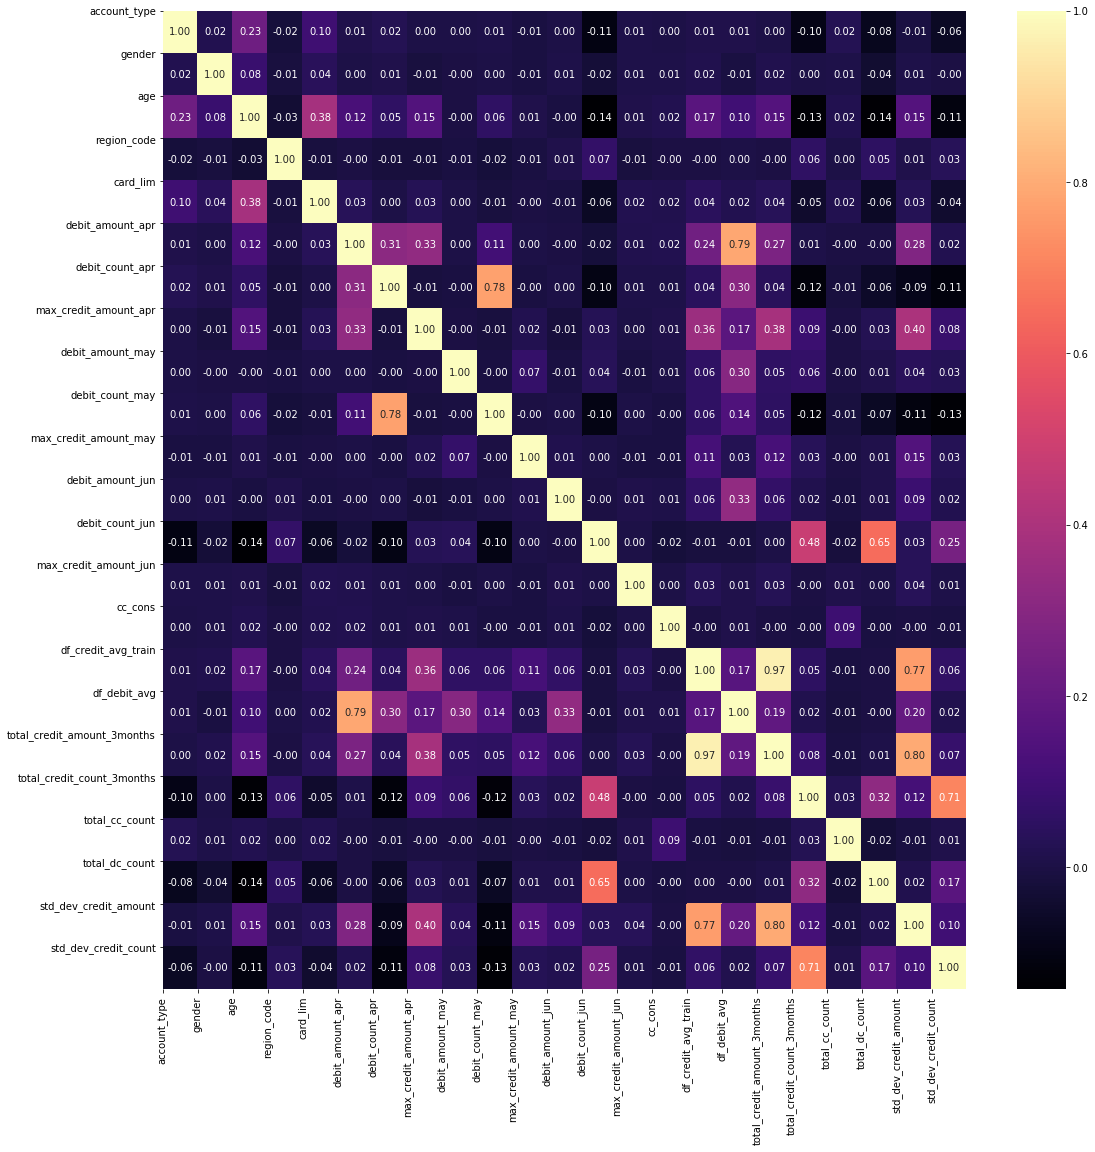

In [41]:
fig, ax = plt.subplots(figsize=(18, 18))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [12]:
# avg spend of credit card in train data 3 months it will give me same information about dataset
train_file['df_credit_avg_train']= train_file[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].mean(axis=1)
train_file['df_debit_avg']= train_file[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].mean(axis=1)
test_file['df_credit_avg_test']= test_file[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].mean(axis=1)
test_file['df_debit_avg']= test_file[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].mean(axis=1)


In [13]:
train_file=train_file.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'
                           ,'investment_1','investment_2','investment_3','investment_4','loan_enq','dc_cons_apr', 'dc_cons_may', 'dc_cons_jun'],axis=1 )
print(train_file.shape)

(15000, 29)


In [14]:
test_file=test_file.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'
                           ,'investment_1','investment_2','investment_3','investment_4','loan_enq','dc_cons_apr', 'dc_cons_may', 'dc_cons_jun'],axis=1 )
print(test_file.shape)

(5000, 28)


In [15]:
# handling missing values
train_file.cc_count_apr.fillna((train_file.cc_count_apr.median()), inplace=True)
train_file.cc_count_may.fillna((train_file.cc_count_may.median()), inplace=True)
train_file.cc_count_jun.fillna((train_file.cc_count_jun.median()), inplace=True)
train_file.dc_count_apr.fillna((train_file.dc_count_apr.median()), inplace=True)
train_file.dc_count_may.fillna((train_file.dc_count_may.median()), inplace=True)
train_file.dc_count_jun.fillna((train_file.dc_count_jun.median()), inplace=True)

# Calculate the median value for train_file['card_lim']
train_file['card_lim'].fillna((train_file['card_lim'].median()), inplace=True)
train_file.debit_amount_apr.fillna((train_file.debit_amount_apr.median()), inplace=True)
train_file.credit_amount_apr.fillna((train_file.debit_amount_may.median()), inplace=True)
train_file.debit_count_apr.fillna((train_file.debit_amount_jun.median()), inplace=True)
train_file.credit_count_apr.fillna((train_file.credit_count_apr.median()), inplace=True)
train_file.max_credit_amount_apr.fillna((train_file.max_credit_amount_apr.median()), inplace=True)
train_file.debit_amount_may.fillna((train_file.debit_amount_may.median()), inplace=True)
train_file.credit_amount_may.fillna((train_file.credit_amount_may.median()), inplace=True)
train_file.credit_count_may.fillna((train_file.credit_count_may.median()), inplace=True)
train_file.debit_count_may.fillna((train_file.debit_amount_may.median()), inplace=True)
train_file.max_credit_amount_may.fillna((train_file.max_credit_amount_may.median()), inplace=True)
train_file.debit_amount_jun.fillna((train_file.debit_amount_jun.median()), inplace=True)
train_file.credit_amount_jun.fillna((train_file.credit_amount_jun.median()), inplace=True)
train_file.credit_count_jun.fillna((train_file.credit_count_jun.median()), inplace=True)
train_file.debit_count_jun.fillna((train_file.debit_count_jun.median()), inplace=True)
train_file.max_credit_amount_jun.fillna((train_file.max_credit_amount_jun.median()), inplace=True)
train_file.df_credit_avg_train.fillna((train_file.df_credit_avg_train.median()), inplace=True)
train_file.df_debit_avg.fillna((train_file.df_debit_avg.median()), inplace=True)


In [16]:
# handling missing values
test_file.cc_count_apr.fillna((test_file.cc_count_apr.median()), inplace=True)
test_file.cc_count_may.fillna((test_file.cc_count_may.median()), inplace=True)
test_file.cc_count_jun.fillna((test_file.cc_count_jun.median()), inplace=True)
test_file.dc_count_apr.fillna((test_file.dc_count_apr.median()), inplace=True)
test_file.dc_count_may.fillna((test_file.dc_count_may.median()), inplace=True)
test_file.dc_count_jun.fillna((test_file.dc_count_jun.median()), inplace=True)

# Calculate the median value for train_file['card_lim']
test_file['card_lim'].fillna((test_file['card_lim'].median()), inplace=True)
test_file.debit_amount_apr.fillna((test_file.debit_amount_apr.median()), inplace=True)
test_file.credit_amount_apr.fillna((test_file.debit_amount_may.median()), inplace=True)
test_file.debit_count_apr.fillna((test_file.debit_count_jun.median()), inplace=True)
test_file.credit_count_apr.fillna((test_file.credit_count_apr.median()), inplace=True)
test_file.max_credit_amount_apr.fillna((test_file.max_credit_amount_apr.median()), inplace=True)
test_file.debit_amount_may.fillna((test_file.debit_amount_may.median()), inplace=True)
test_file.credit_amount_may.fillna((test_file.credit_amount_may.median()), inplace=True)
test_file.credit_count_may.fillna((test_file.credit_count_may.median()), inplace=True)
test_file.debit_count_may.fillna((test_file.debit_amount_may.median()), inplace=True)
test_file.max_credit_amount_may.fillna((test_file.max_credit_amount_may.median()), inplace=True)
test_file.debit_amount_jun.fillna((test_file.debit_amount_jun.median()), inplace=True)
test_file.credit_amount_jun.fillna((test_file.credit_amount_jun.median()), inplace=True)
test_file.credit_count_jun.fillna((test_file.credit_count_jun.median()), inplace=True)
test_file.debit_count_jun.fillna((test_file.debit_count_jun.median()), inplace=True)
test_file.max_credit_amount_jun.fillna((test_file.max_credit_amount_jun.median()), inplace=True)
test_file.df_credit_avg_test.fillna((test_file.df_credit_avg_test.median()), inplace=True)
test_file.df_debit_avg.fillna((test_file.df_debit_avg.median()), inplace=True)


In [17]:
print("\n train file : \n")
print(train_file.isnull().sum())
print("\n test file : \n")
print(test_file.isnull().sum())


 train file : 

account_type             0
gender                   0
age                      0
region_code              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
cc_cons                  0
df_credit_avg_train      0
df_debit_avg             0
dtype: int64

 test file : 

account_type             0
gender                   0
age                      0
region_code              0
cc_count_apr             0
cc_count_may             0
cc_count_

In [18]:
print("\n train file: \n")
print(train_file.info())
print("\n test file: \n")
print(test_file.info())



 train file: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
account_type             15000 non-null int32
gender                   15000 non-null int32
age                      15000 non-null int64
region_code              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
debit_amount_apr         15000 non-null float64
credit_amount_apr        15000 non-null float64
debit_count_apr          15000 non-null float64
credit_count_apr         15000 non-null float64
max_credit_amount_apr    15000 non-null float64
debit_amount_may         15000 non-null float64
credit_amount_may        15000 non-null float64
credit_count_may 

In [19]:

train_file['total_credit_amount_3months'] = train_file['credit_amount_apr'] + train_file['credit_amount_may'] + train_file['credit_amount_jun']
train_file['total_credit_count_3months'] = train_file['credit_count_apr'] + train_file['credit_count_may'] + train_file['credit_count_jun']
train_file['total_cc_count'] = train_file['cc_count_apr'] + train_file['cc_count_may'] + train_file['cc_count_jun']
train_file['total_dc_count'] = train_file['dc_count_apr'] + train_file['dc_count_may'] + train_file['dc_count_jun']
test_file['total_cc_count'] = test_file['cc_count_apr'] + test_file['cc_count_may'] + test_file['cc_count_jun']
test_file['total_dc_count'] = test_file['dc_count_apr'] + test_file['dc_count_may'] + test_file['dc_count_jun']

train_file['std_dev_credit_amount'] = train_file.apply(lambda x: np.std([x['credit_amount_apr'], x['credit_amount_may'], x['credit_amount_jun']]), axis = 1)

train_file['std_dev_credit_count'] = train_file.apply(lambda x: np.std([x['credit_count_apr'], x['credit_count_may'], x['credit_count_jun']]), axis = 1)

test_file['total_credit_amount_3months'] = test_file['credit_amount_apr'] + test_file['credit_amount_may'] + test_file['credit_amount_jun']
test_file['total_credit_count_3months'] = test_file['credit_count_apr'] + test_file['credit_count_may'] + test_file['credit_count_jun']

test_file['std_dev_credit_amount'] = test_file.apply(lambda x: np.std([x['credit_amount_apr'], x['credit_amount_may'], x['credit_amount_jun']]), axis = 1)

test_file['std_dev_credit_count'] = test_file.apply(lambda x: np.std([x['credit_count_apr'], x['credit_count_may'], x['credit_count_jun']]), axis = 1)

train_file.isnull().sum()

account_type                   0
gender                         0
age                            0
region_code                    0
cc_count_apr                   0
cc_count_may                   0
cc_count_jun                   0
dc_count_apr                   0
dc_count_may                   0
dc_count_jun                   0
card_lim                       0
debit_amount_apr               0
credit_amount_apr              0
debit_count_apr                0
credit_count_apr               0
max_credit_amount_apr          0
debit_amount_may               0
credit_amount_may              0
credit_count_may               0
debit_count_may                0
max_credit_amount_may          0
debit_amount_jun               0
credit_amount_jun              0
credit_count_jun               0
debit_count_jun                0
max_credit_amount_jun          0
cc_cons                        0
df_credit_avg_train            0
df_debit_avg                   0
total_credit_amount_3months    0
total_cred

In [20]:
train_file=train_file.drop(['region_code','cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun','credit_amount_apr','credit_amount_may','credit_amount_jun','credit_count_apr','credit_count_may','credit_count_jun'],axis=1 )
test_file=test_file.drop(['cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun','credit_amount_apr','credit_amount_may','credit_amount_jun','credit_count_apr','credit_count_may','credit_count_jun'],axis=1 )
print(train_file.shape),

(15000, 23)


(None,)

In [42]:
X=train_file.drop('cc_cons',axis=1)
y=train_file['cc_cons']

y=y.astype('int')
print(X.shape)
X.head()

(15000, 22)


,account_type,gender,age,region_code,card_lim,debit_amount_apr,debit_count_apr,max_credit_amount_apr,debit_amount_may,debit_count_may,max_credit_amount_may,debit_amount_jun,debit_count_jun,max_credit_amount_jun,df_credit_avg_train,df_debit_avg,total_credit_amount_3months,total_credit_count_3months,total_cc_count,total_dc_count,std_dev_credit_amount,std_dev_credit_count
0,1,0,36,336.0,248145.0,73179.474208,0.0,471134.273813,436171.358054,1.0,110403.214364,1.114847e+06,1.0,161824.467583,685970.162897,541399.402065,2.057910e+06,6.0,22.0,5.0,39057.088833,0.000000
1,0,1,24,529.0,24005.0,405375.599701,20.0,424970.394837,629510.469240,17.0,336653.547124,4.010666e+05,31.0,530033.850635,186794.006799,478650.901222,5.603820e+05,16.0,55.0,23.0,39249.256869,3.399346
2,0,1,34,541.0,55953.0,422194.833963,28.0,120890.570583,616448.408016,22.0,359000.879855,8.944534e+05,24.0,481495.648386,901010.546247,644365.536275,2.703032e+06,12.0,50.0,20.0,704228.866004,0.816497
3,0,1,39,523.0,406984.0,33573.884833,43.0,435724.515259,280011.283977,39.0,217724.536892,1.772801e+06,37.0,536714.940949,692206.492736,695461.918319,2.076619e+06,18.0,25.0,24.0,428581.126359,0.816497
4,0,1,28,239.0,34545.0,161189.083681,5.0,279918.414129,206119.371916,15.0,519029.306872,8.525740e+05,26.0,349316.588945,437671.808936,406627.487190,1.313015e+06,12.0,69.0,22.0,127907.468737,0.816497


In [48]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=17)
chi_selector.fit(X_norm, y)

SelectKBest(k=17, score_func=<function chi2 at 0x000002B946FABF28>)

In [49]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature


17 selected features


['account_type',
 'gender',
 'age',
 'region_code',
 'card_lim',
 'debit_amount_apr',
 'debit_count_apr',
 'max_credit_amount_apr',
 'debit_amount_may',
 'debit_count_may',
 'debit_count_jun',
 'max_credit_amount_jun',
 'df_debit_avg',
 'total_credit_count_3months',
 'total_cc_count',
 'total_dc_count',
 'std_dev_credit_count']

In [59]:
X=train_file[chi_feature]
y=train_file['cc_cons']

In [60]:
test_file=test_file[chi_feature]
test_file.head(5)

,account_type,gender,age,region_code,card_lim,debit_amount_apr,debit_count_apr,max_credit_amount_apr,debit_amount_may,debit_count_may,debit_count_jun,max_credit_amount_jun,df_debit_avg,total_credit_count_3months,total_cc_count,total_dc_count,std_dev_credit_count
0,1,0,30,528.0,45553.0,463739.683047,19.0,414855.130729,536192.664464,7.0,13.0,398008.239676,554537.355795,10.0,45.0,15.0,1.699673
1,1,1,39,762.0,191137.0,448622.399166,23.0,589557.278448,148220.153433,13.0,18.0,299411.136857,772987.360991,10.0,37.0,34.0,1.885618
2,0,1,40,670.0,82114.0,182112.736659,23.0,91845.314970,479041.867291,21.0,18.0,122919.566871,317436.308327,19.0,24.0,19.0,2.624669
3,0,0,24,548.0,74866.0,549095.984242,15.0,234808.062527,459470.252371,19.0,12.0,549513.485678,564542.568849,17.0,13.0,8.0,3.399346
4,0,1,33,515.0,73548.0,188671.004952,22.0,370699.272099,263422.644148,38.0,34.0,198565.622807,334885.883453,25.0,28.0,36.0,5.734884


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.41, random_state=42)
X_train.shape

(8850, 17)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8850, 17)
(6150, 17)
(8850,)
(6150,)


In [79]:
# Fit regression model
params = {'n_estimators': 120, 'max_depth':10, 'min_samples_split': 2,'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(learning_rate=0.08, min_samples_split=100,min_samples_leaf=100,max_depth=5,
                                         n_estimators=100,subsample=0.6,random_state=33)
clf.fit(X_train, y_train)
rmse = math.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
#print("RMSE: %.4f" % rmse)
msle =np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))
msle.round(2)

1.09

In [29]:
select_row = test_file.loc[test_file1.ID ==8687]


,account_type,gender,age,region_code,card_lim,debit_amount_apr,debit_count_apr,max_credit_amount_apr,debit_amount_may,debit_count_may,debit_count_jun,max_credit_amount_jun,df_debit_avg,total_credit_count_3months,total_cc_count,total_dc_count,std_dev_credit_count
3,0,0,24,548.0,74866.0,549095.984242,15.0,234808.062527,459470.252371,19.0,12.0,549513.485678,564542.568849,17.0,13.0,8.0,3.399346


In [30]:
clf.predict(select_row)

array([10569.90050485])

In [31]:
prediction=[]
prediction=clf.predict(test_file)
prediction=pd.DataFrame(prediction,columns=['cc_cons'])
prediction.head(5)

,cc_cons
0,10255.632184
1,10867.794392
2,12803.370011
3,10569.900505
4,13290.991316


In [32]:
predictions=pd.concat([test_file1['ID'],prediction],axis=1)
predictions.head(5)

,ID,cc_cons
0,17591,10255.632184
1,13541,10867.794392
2,13431,12803.370011
3,8687,10569.900505
4,14727,13290.991316


In [33]:
predictions.to_csv('submission_data.csv', encoding='utf-8')

In [34]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge_rmse=np.sqrt(mean_squared_error(ridge_pred, y_test))
ridge_rmse=np.sqrt(mean_squared_log_error(ridge_pred, y_test))
ridge_rmse.round(2)

1.09

In [35]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
lasso_rmse=np.sqrt(mean_squared_log_error(lasso_pred, y_test))
lasso_rmse.round(2)

1.09